In [1]:
import torch
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

from torch                 import nn
from sklearn.preprocessing import MinMaxScaler

# 处理数据

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X      = data.iloc[:,:-1]
Y      = data.iloc[:,-1]

In [5]:
scaler = MinMaxScaler()
X      = scaler.fit_transform(X)

In [6]:
X = torch.from_numpy(X).type(torch.float32)
Y = torch.from_numpy(Y.values.reshape(-1, 1)).type(torch.float32)

In [7]:
X.shape, Y.shape

(torch.Size([400, 2]), torch.Size([400, 1]))

# 创建模型

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2,32)
        self.linear2 = nn.Linear(32,64)
        self.linear3 = nn.Linear(64,128)
        self.linear4 = nn.Linear(128,1)
        self.relu    = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,input):
        x = self.linear1(input)
        x = self.relu(x)            
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.sigmoid(x)        
        return x

In [9]:
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear  = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        x = self.linear(input)
        x = self.sigmoid(x)
        return x

# 训练模型

In [10]:
def get_model():
    model = MLP()
    opt   = torch.optim.SGD(model.parameters(),lr=0.3)
    return model, opt

In [11]:
model,optim        = get_model()
loss_fn            = nn.MSELoss()

batch_size         = 32
number_of_batch    = len(data) // batch_size
epoches            = 100
losses             = []

In [12]:
for epoch in range(epoches):
    for i in range(number_of_batch):
        
        start = i * batch_size
        end   = i * batch_size + batch_size
        x     = X[start:end]
        y     = Y[start:end]
        
        y_pred= model(x)
        loss  = loss_fn(y_pred,y)
        
        optim.zero_grad()
        loss.backward()
        
        optim.step()
        
    with torch.no_grad():
        loss  =  loss_fn(model(X),Y).data.item()
        losses.append(loss)
        print(f'Epoch: {epoch + 1}, Loss: {loss}')

Epoch: 1, Loss: 0.23366357386112213
Epoch: 2, Loss: 0.22707366943359375
Epoch: 3, Loss: 0.2212638407945633
Epoch: 4, Loss: 0.21494825184345245
Epoch: 5, Loss: 0.20690670609474182
Epoch: 6, Loss: 0.1952233463525772
Epoch: 7, Loss: 0.18057893216609955
Epoch: 8, Loss: 0.16629157960414886
Epoch: 9, Loss: 0.15733729302883148
Epoch: 10, Loss: 0.15610237419605255
Epoch: 11, Loss: 0.15814918279647827
Epoch: 12, Loss: 0.16003361344337463
Epoch: 13, Loss: 0.15744154155254364
Epoch: 14, Loss: 0.15321852266788483
Epoch: 15, Loss: 0.14749929308891296
Epoch: 16, Loss: 0.1416875272989273
Epoch: 17, Loss: 0.13706621527671814
Epoch: 18, Loss: 0.13253824412822723
Epoch: 19, Loss: 0.12849615514278412
Epoch: 20, Loss: 0.12494856119155884
Epoch: 21, Loss: 0.12145695090293884
Epoch: 22, Loss: 0.1183735579252243
Epoch: 23, Loss: 0.11570513993501663
Epoch: 24, Loss: 0.11257725954055786
Epoch: 25, Loss: 0.11051202565431595
Epoch: 26, Loss: 0.10787215083837509
Epoch: 27, Loss: 0.10595264285802841
Epoch: 28, Los

In [13]:
model(X).data.numpy()

array([[0.00784047],
       [0.02633135],
       [0.01078087],
       [0.01314856],
       [0.03066595],
       [0.0138022 ],
       [0.07883047],
       [0.9457931 ],
       [0.01029376],
       [0.03350354],
       [0.0486152 ],
       [0.01094612],
       [0.05961202],
       [0.01703609],
       [0.043193  ],
       [0.06695346],
       [0.84309196],
       [0.6870736 ],
       [0.76569587],
       [0.8631565 ],
       [0.71872896],
       [0.7076403 ],
       [0.82942224],
       [0.71872896],
       [0.7957703 ],
       [0.85662663],
       [0.8849124 ],
       [0.8235227 ],
       [0.01243008],
       [0.01550542],
       [0.04704231],
       [0.8752875 ],
       [0.00862983],
       [0.01185289],
       [0.16506624],
       [0.02391077],
       [0.01752255],
       [0.01362245],
       [0.0287667 ],
       [0.01136106],
       [0.01177561],
       [0.01783336],
       [0.7957861 ],
       [0.01462132],
       [0.09323178],
       [0.00944377],
       [0.04272032],
       [0.011

In [14]:
((model(X).data.numpy() > 0.5).astype(np.int32)==Y.numpy()).mean()

0.92

# 可视化

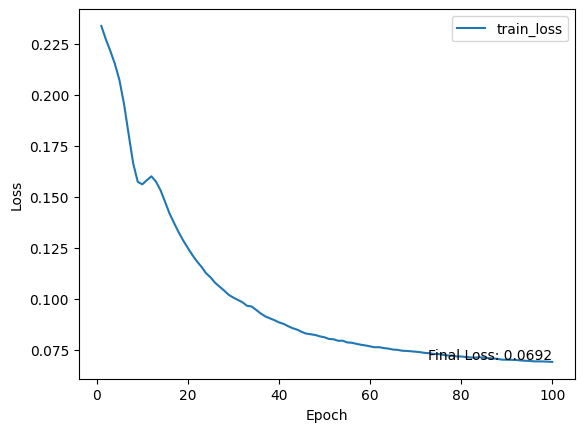

In [15]:
final_loss = losses[-1]
plt.plot(range(1,epoches+1),losses,label = 'train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.text(epoches, final_loss, f'Final Loss: {final_loss:.4f}', ha='right', va='bottom')
plt.legend()

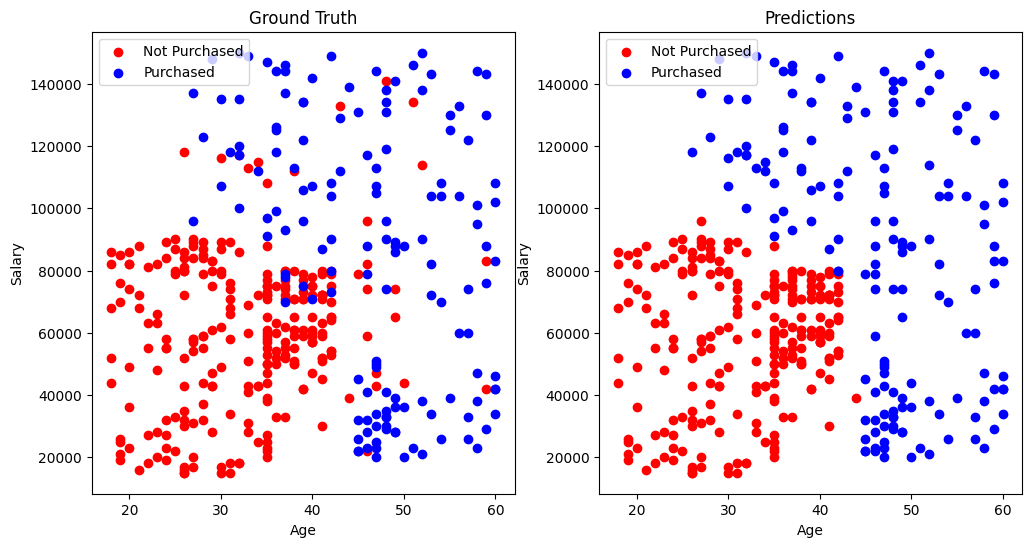

In [16]:
predictions = (model(X).data.numpy() > 0.5).astype(int)
predictions = predictions.flatten()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

X        = data.iloc[:,:-1]
Y        = data.iloc[:,-1]

feature1 = X.iloc[:, 0]
feature2 = X.iloc[:, 1]

ax1.scatter(feature1[Y == 0], feature2[Y == 0], color='red', label='Not Purchased')
ax1.scatter(feature1[Y == 1], feature2[Y == 1], color='blue', label='Purchased')
ax1.set_title('Ground Truth')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.legend()

ax2.scatter(feature1[predictions == 0], feature2[predictions == 0], color='red', label='Not Purchased')
ax2.scatter(feature1[predictions == 1], feature2[predictions == 1], color='blue', label='Purchased')
ax2.set_title('Predictions')
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.legend()

plt.show()